## What is Finetuning?

Finetuning is a type of transfer learning where a pre-trained model is adapted to a specific task using additional data. It is commonly used in Natural Language Processing (NLP) and other AI fields to refine models for specific applications without starting from scratch.

### Key Points

- Transfer Learning:
    - Finetuning is a specialized form of transfer learning.
    - It involves taking a pre-trained model and adjusting it to better suit a specific task.
- Applications in NLP:
    - Classification: Sorting text into predefined categories (e.g., spam detection).
    - Sentiment Analysis: Determining the sentiment expressed in text (e.g., positive or negative reviews).
    - Named Entity Recognition (NER): Identifying and classifying entities in text (e.g., names of people, places, organizations).
- Efficiency:
    - Using a pre-trained model with billions of samples can significantly reduce the amount of new data needed.
    - Typically requires only a few hundred to a few thousand new samples for effective finetuning.

### Task-Specific Examples for Fine-tuning

- Sentiment Analysis:
    - Pre-trained Model: Trained on a diverse range of texts from the internet.
    - Finetuning Dataset: Movie reviews labeled as positive or negative.
    - Outcome: The model learns to identify sentiment in reviews accurately.
- Named Entity Recognition (NER):
    - Pre-trained Model: Trained on general text data.
    - Finetuning Dataset: Medical literature with annotated entities like drug names, diseases, and treatments.
    - Outcome: The model becomes proficient in recognizing medical terms and their classifications.
- Text Classification:
    - Pre-trained Model: Trained on a wide variety of news articles.
    - Finetuning Dataset: Articles categorized into specific topics such as sports, politics, and technology.
    - Outcome: The model can accurately classify new articles into these predefined categories.

### Real World Use case where Finetuning Helped
[Honeycomb’s Natural Language Query Assistant](https://www.honeycomb.io/blog/introducing-query-assistant): Initially, the “programming manual” was provided in the prompt together with n-shot examples for in-context learning. While this worked decently, fine-tuning the model led to better output on the syntax and rules of the domain-specific language.

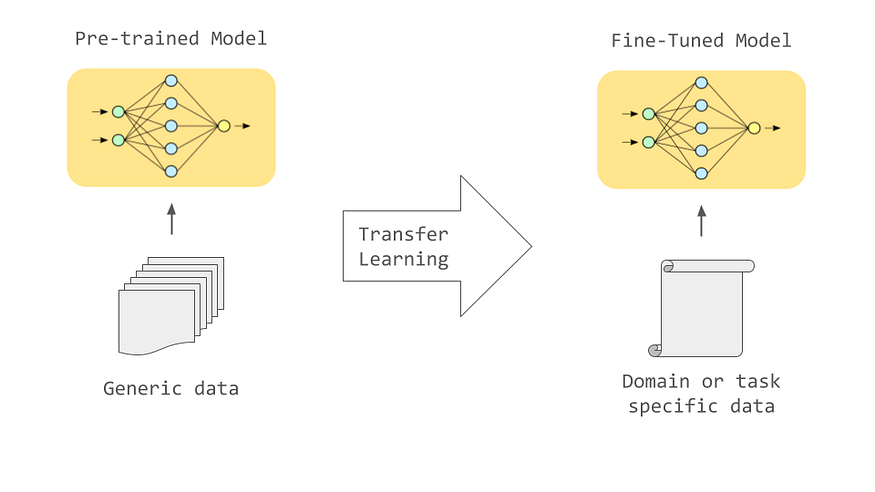

## Misconceptions About Fine-Tuning

Fine-tuning is a crucial concept in machine learning, but it's often misunderstood. This section aims to clarify some common misconceptions.

### Fine-Tuning Introduces New Information

Contrary to this belief, fine-tuning does not introduce new knowledge to the model. Instead, it leverages the model's pre-existing understanding to accomplish a different task.Finetuning focuses on new tasks, not new information. A task is reusing the model's existing knowledge to accomplish a different task.


### Analogy: Tying a Rope

To better understand, consider this analogy. If you know how to tie your shoes, you can use the same skills to tie a rope. The basic principles are the same; the task is the difference.

### Comparison: RAG vs Fine-tuning

To further clarify the differences, let's compare fine-tuning with another technique known as RAG (Retrieval-Augmented Generation).

|                              | RAG | Fine-tuning |
|------------------------------|:---:|:-----------:|
| Requires external knowledge? |  ✔️  |      ❌     |
| Requires changing model behavior? |  ❌  |      ✔️     |
| Minimizes hallucinations?    |  ✔️  |      ❌     |
| Requires training data?      |  ❌  |      ✔️     |
| Is data (mostly) dynamic?    |  ✔️  |      ❌     |
| Requires interpretability?   |  ✔️  |      ❌     |



In a comparative analysis, Retrieval-Augmented Generation (RAG) has shown a distinct advantage over fine-tuning in specific tasks like the MMLU and those involving current events. While fine-tuning does improve upon the base model's performance, it falls short of RAG's effectiveness. The contributing factors to this are twofold: RAG not only enriches the model with additional knowledge but also integrates relevant context to the question at hand, which is something fine-tuning does not do. Additionally, fine-tuning carries the risk of catastrophic forgetting, which may unintentionally degrade the model's performance in other areas.

[Link](https://arxiv.org/pdf/2312.05934) to the Original Paper 

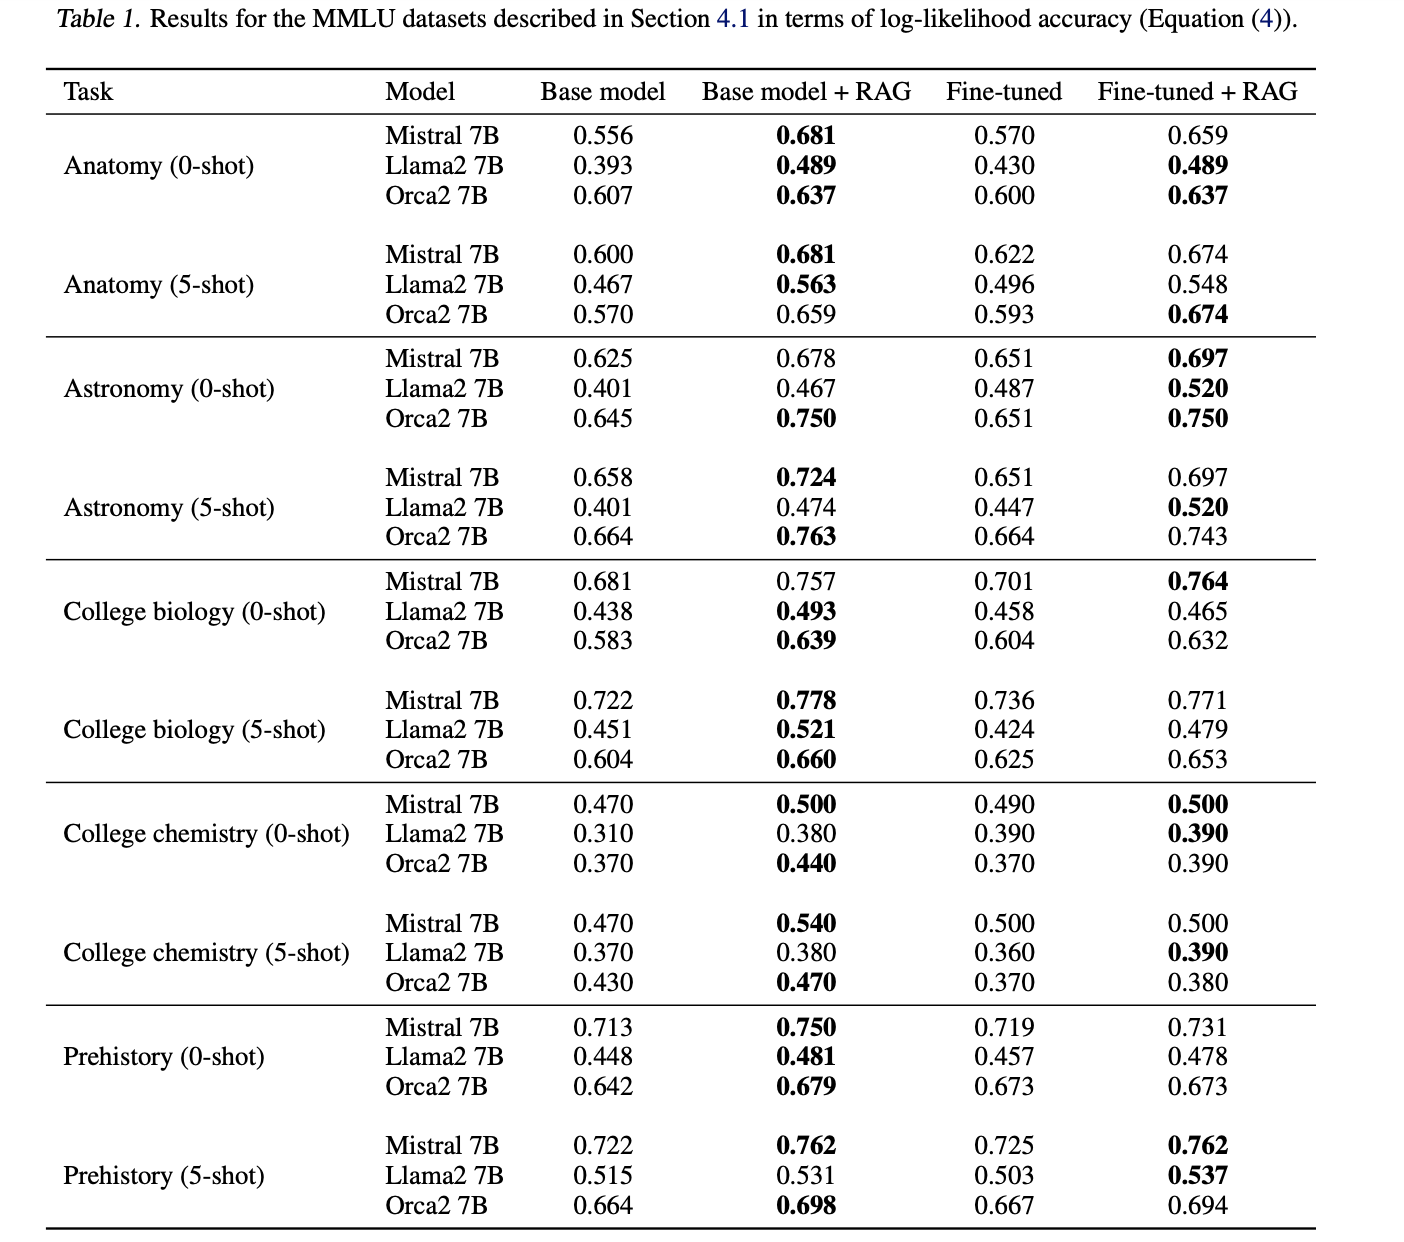


## What Finetuning is Good At?
Fine-tuning a language model like GPT-3 is particularly beneficial when you need to teach the model new patterns, specific formats, or niche content areas. Here are some key points highlighting what fine-tuning is good for:

1. **Specialized Patterns and Formats**:
    - Fine-tuning excels at teaching the model to recognize and generate specific patterns. For instance, email formats, JSON, HTML, XML, PERL, and C++ are all examples of specific patterns that can be ingrained in the model through fine-tuning.
  
2. **Contextual Understanding**:
    - It enhances the model's ability to understand and respond to specific types of user queries. For example, ChatGPT-style interactions involve short user queries followed by long machine-generated responses, a pattern that can be fine-tuned for improved accuracy.

3. **Creative Writing**:
    - Fiction writing is another area where fine-tuning can be extremely effective. By training the model on fiction, it can learn the nuances of storytelling, character development, and dialogue, making it a useful tool for generating creative content.

4. **Highly Specific Applications**:
    - If there's a need for the model to reliably follow a highly specific and consistent pattern, fine-tuning is the way to achieve this. This could include anything from technical documentation to personalized customer service responses.

Fine-tuning can be highly effective for classification tasks, especially in scenarios where categories are broad or generic. By  fine-tuning, it becomes more adept at distinguishing subtle differences between categories that may not be starkly defined. This process does not rely on external knowledge sources like Retrieval-Augmented Generation (RAG), but instead, it refines the model's pre-existing knowledge to better align with the classification objectives. As a result, fine-tuning can lead to improved accuracy and consistency in classifying texts into their appropriate categories, even when those categories do not have a rigid or explicit definition.

Let's look at the case where finetuning is going to be effective. We are going to use the dataset that was declared in Assignment-1 which was a classification task


In [111]:
import pandas as pd
import openai
from dotenv import load_dotenv
import os
from sklearn.model_selection import train_test_split
import time

In [112]:
data_csv = pd.read_csv('../data/text-classification/train.csv')
train_csv, test_csv = train_test_split(data_csv, test_size=0.2,random_state=42)

In [113]:
# these are all the category labels in the training set
category_labels = train_csv.label_text.unique()
categories_list = "- " + "\n- ".join(category_labels)
system_prompt = f"""
You are an agent that is specialized in classification tasks.\n
Along with the input text, you are provided with the top 10 documents retrieved from a Retrieval-Augmented Generation (RAG) model. 
Use this information to classify the input text into one of the following categories:
{categories_list}
Note: The documents are included in the user's message for context.
"""

In [114]:
category_labels

array(['iot', 'not toxic', 'play_music',
       'balance_not_updated_after_cheque_or_cash_deposit',
       'weather_query', 'weather', 'news', 'exchange_rate', 'alarm_set',
       'takeaway_query', 'play', 'datetime', 'automatic_top_up',
       'cancel_transfer', 'extra_charge_on_statement', 'general',
       'why_verify_identity', 'datetime_query', 'toxic', 'news_query',
       'alarm', 'wrong_amount_of_cash_received', 'top_up_limits',
       'transfer_not_received_by_recipient',
       'card_payment_not_recognised', 'audio_volume_mute', 'music_query',
       'takeaway', 'lost_or_stolen_card', 'card_not_working',
       'card_linking', 'pending_top_up', 'iot_coffee', 'pin_blocked',
       'music', 'pending_cash_withdrawal', 'alarm_remove',
       'unable_to_verify_identity', 'card_arrival',
       'getting_virtual_card', 'exchange_via_app', 'iot_hue_lightoff',
       'fiat_currency_support', 'supported_cards_and_currencies',
       'edit_personal_details', 'music_likeness',
       'ca

## How to Finetune

In [115]:
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY")
openai_client = openai.OpenAI(api_key=openai_api_key)

### Prepare Data For Finetuning

In [75]:
# create training file for fine tuning , the data needs to be preprocessed in a specific way to finetune a model
import json
training_data = []
for row in train_csv.iterrows():
    label = row[1].label_text
    text = row[1].text
    training_data.append({
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": text},
            {"role": "assistant", "content": label}
        ]
    })
training_file_name = "../data/text-classification/new_training_data.jsonl"
def prepare_data(dictionary_data, final_file_name):
    with open(final_file_name, 'w') as outfile:
        for entry in dictionary_data:
            json.dump(entry, outfile)
            outfile.write('\n')
prepare_data(training_data, training_file_name)

### Upload Data For Finetuning

In [76]:
# upload training file to openai
training_file_id = openai_client.files.create(
  file=open(training_file_name, "rb"),
  purpose="fine-tune"
)
print(f"Training File ID: {training_file_id}")

Training File ID: FileObject(id='file-dl40RvUHbTR5KWh3OD7WcFZk', bytes=14200775, created_at=1717400849, filename='new_training_data.jsonl', object='file', purpose='fine-tune', status='processed', status_details=None)


### Create Finetuning Job

Some Hyperparameters for fine tuning you can change are:

- batch_size : Number of examples in each batch. A larger batch size means that model parameters are updated less frequently, but with lower variance.

- learning_rate_multiplier: Scaling factor for the learning rate. A smaller learning rate may be useful to avoid overfitting.

- n_epochs:The number of epochs to train the model for. An epoch refers to one full cycle through the training dataset.

In [86]:
# create fine tuning job on openai
response = openai_client.fine_tuning.jobs.create(
  training_file=training_file_id.id,
  model="gpt-3.5-turbo",
  hyperparameters={
    "n_epochs": 1,
  }
)
job_id = response.id
status = response.status
print(f'Fine-tunning model with jobID: {job_id}.')
print(f"Training Response: {response}")
print(f"Training Status: {status}")

Fine-tunning model with jobID: ftjob-K2hZChUK3QqLbjDZxI3XUgQj.
Training Response: FineTuningJob(id='ftjob-K2hZChUK3QqLbjDZxI3XUgQj', created_at=1717403916, error=Error(code=None, message=None, param=None), fine_tuned_model=None, finished_at=None, hyperparameters=Hyperparameters(n_epochs=1, batch_size='auto', learning_rate_multiplier='auto'), model='gpt-3.5-turbo-0125', object='fine_tuning.job', organization_id='org-bx8UmNWyClGMb1kBUdofHdpY', result_files=[], seed=1336267681, status='validating_files', trained_tokens=None, training_file='file-dl40RvUHbTR5KWh3OD7WcFZk', validation_file=None, estimated_finish=None, integrations=[], user_provided_suffix=None)
Training Status: validating_files


Takes ~70-80 mins to finetune on 6k rows

In [ ]:
def check_fine_tuning_job_status(openai_client, job_id):
    def retrieve_job_status():
        return openai_client.fine_tuning.jobs.retrieve(job_id).status

    status = retrieve_job_status()
    while status not in ["succeeded", "failed"]:
        print(f"Job not in terminal status: {status}. Waiting.")
        time.sleep(10)
        status = retrieve_job_status()
        print(f"Status: {status}")

    print(f"Finetune job {job_id} finished with status: {status}")

    def check_other_jobs():
        result = openai_client.fine_tuning.jobs.list()
        print(f"Found {len(result.data)} finetune jobs.")

    check_other_jobs()

check_fine_tuning_job_status(openai_client, job_id)


In [98]:
fine_tuned_model = openai_client.fine_tuning.jobs.retrieve(job_id).fine_tuned_model
print(fine_tuned_model)

ft:gpt-3.5-turbo-0125:personal::9VySD7OR


In [118]:
import sys
sys.path.append("../")
from scripts.utils import chat_completion_request
messages = [
    {
        "role": "system",
        "content": system_prompt,
    },
    {"role": "user", "content": test_csv.iloc[0].text},
]
chat_completion_request(messages=messages,model=fine_tuned_model)


INFO:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'play_music'

### Comparision Between Different Techniques

| Technique                          | Accuracy | Macro Avg Precision | Macro Avg Recall | Macro Avg F1-Score | Weighted Avg Precision | Weighted Avg Recall | Weighted Avg F1-Score |
|------------------------------------|----------|---------------------|------------------|--------------------|------------------------|---------------------|-----------------------|
| Finetuned Model without RAG        | 0.68     | 0.61                | 0.63             | 0.57               | 0.69                   | 0.68                | 0.62                  |
| Finetuned Model with RAG           | 0.59     | 0.46                | 0.48             | 0.46               | 0.54                   | 0.59                | 0.55                  |
| Base Model with RAG    | 0.51     | 0.41                | 0.43             | 0.41               | 0.52                   | 0.51                | 0.50                  |
| Base Model without RAG  | 0.39     | 0.46                | 0.41             | 0.37               | 0.57                   | 0.39                | 0.37                  |

The reason for Naive Finetuned Model perfroming better than Finetuned + RAG as few shot might be 
Complexity Overhead: The integration of RAG might introduce unnecessary complexity, which can detract from the fine-tuned model's ability to make clear-cut decisions based on its specialized training. 